In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#!wget https://raw.githubusercontent.com/JasonMorris1/CSE151_Tesla_Stock_Prediction/main/tsla_2014_2023.csv
df = pd.read_csv('tsla_2014_2023.csv')
df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df.drop(columns=['open', 'high', 'low']) # not sure why we do this
df.head()




,date,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close,year
0,2014-01-02,10.006667,92826000,55.344071,54.440118,-37.373644,15.213422,9.682107,9.820167,10.494240,9.674284,0.169472,9.740800,0.395333,0.402641,0.447550,9.970667,2014
1,2014-01-03,9.970667,70425000,53.742629,53.821521,-81.304471,17.481130,9.652800,9.826069,10.495693,9.680190,0.162623,9.776167,0.239333,0.379311,0.432677,9.800000,2014
2,2014-01-06,9.800000,80416500,46.328174,50.870410,-123.427544,-37.824708,9.629467,9.825047,10.496740,9.682577,0.141790,9.797900,0.344000,0.374267,0.426343,9.957333,2014
3,2014-01-07,9.957333,75511500,53.263037,53.406750,-84.784651,-20.779431,9.597747,9.830235,10.503407,9.688051,0.136402,9.837900,0.343334,0.369848,0.420414,10.085333,2014
4,2014-01-08,10.085333,92448000,58.368660,55.423026,60.799662,43.570559,9.573240,9.840239,10.511147,9.695964,0.140837,9.870167,0.329334,0.364060,0.413908,9.835333,2014


In [9]:
# df_train=df[(df.year<2023) & (df.year>2017)]
# df_test=df[df.year==2023]

df_train=df[(df.year<2022)]
df_test=df[(df.year >=2022)]

X_train=df_train.drop(['date','year','next_day_close'],axis=1)
X_test=df_test.drop(['date','year','next_day_close'],axis=1)
##
y_train=df_train['next_day_close']
y_test=df_test['next_day_close']

X_train_date = df_train['date']
X_test_date = df_test['date']

In [10]:
X_train.columns

Index(['close', 'volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50',
       'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange',
       'atr_7', 'atr_14'],
      dtype='object')

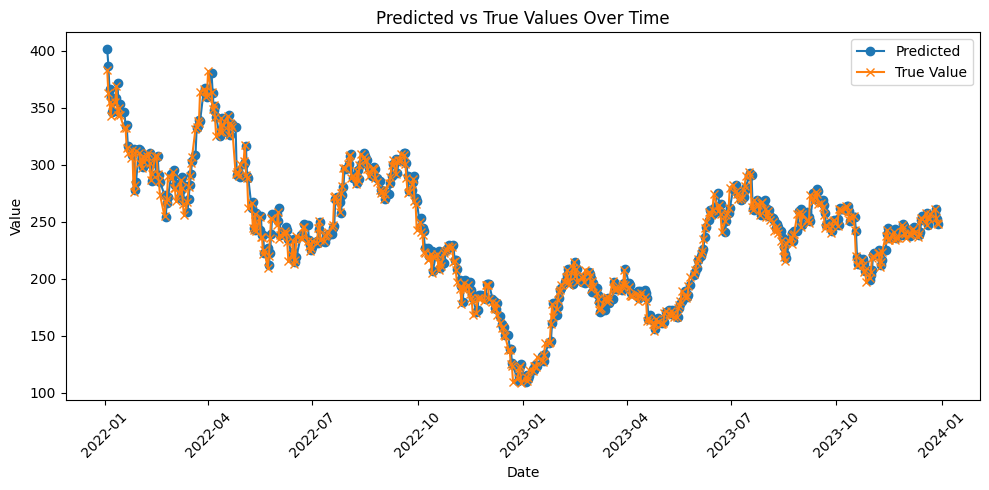

            true   predicted
2015  383.196655  401.470426
2016  362.706665  386.905987
2017  354.899994  366.472447
2018  342.320007  359.002911
2019  352.706665  346.278893
...          ...         ...
2511  256.609985  252.466949
2512  261.440002  256.407239
2513  253.179993  260.854346
2514  248.479996  252.083046
2515  248.419998  247.648312

[501 rows x 2 columns]
mse: 86.87
mae: 6.93


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# X_train_scaled.shape, X_test_scaled.shape


# print(X_train_scaled)
# print(y_train)
from sklearn.metrics import classification_report

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)


plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(X_test_date, y_pred, label='Predicted', marker='o')  # Plot predicted values

#plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values
#x3,y3 = zip(*sorted(zip(X_test_date, y_test),key=lambda x: x[0]))
plt.plot(X_test_date, y_test, label='True Value', marker='x')  # Plot true values


# Adding titles and labels
plt.title('Predicted vs True Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')

# Adding a legend
plt.legend()

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

#print(y_pred.shape)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

df_result = pd.DataFrame()
df_result['true']= y_test
df_result['predicted']= y_pred

print(df_result)
print(f"mse: {mse:.2f}")
print(f"mae: {mae:.2f}")


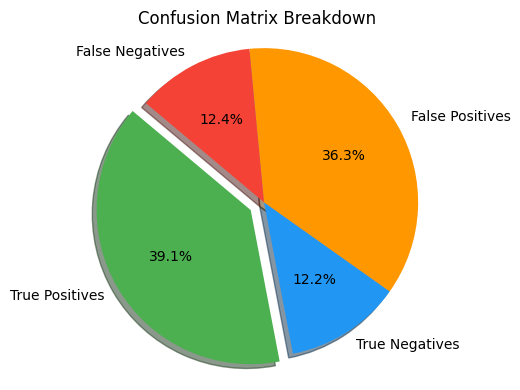

      true  predicted
2015     0          0
2016     0          1
2017     0          1
2018     0          1
2019     1          1
...    ...        ...
2511     1          1
2512     1          1
2513     0          1
2514     0          1
2515     0          1

[501 rows x 2 columns]
Accuracy: 0.51
Recall: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33       243
           1       0.52      0.76      0.62       258

    accuracy                           0.51       501
   macro avg       0.51      0.51      0.47       501
weighted avg       0.51      0.51      0.48       501



In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score
# Transform y_train and y_test to binary: 1 for increase, 0 for no change or decrease
y_train_binary = (y_train.diff().fillna(0) > 0).astype(int)
y_test_binary = (y_test.diff().fillna(0) > 0).astype(int)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train_binary)
y_pred_binary = logreg.predict(X_test_scaled)

#Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)
tn, fp, fn, tp = cm.ravel()

labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
sizes = [tp, tn, fp, fn]
colors = ['#4CAF50', '#2196F3', '#FF9800', '#F44336']
explode = (0.1, 0, 0, 0)  # explode the first slice (True Positives)

plt.figure(figsize=(5, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Confusion Matrix Breakdown')
plt.axis('equal')

# Rotating date labels for better readability
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

accuracy = accuracy_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)


report = classification_report(y_test_binary, y_pred_binary)

df_result = pd.DataFrame({'true': y_test_binary, 'predicted': y_pred_binary})

print(df_result)
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print("Classification Report:\n", report)